In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
%matplotlib inline

In [37]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [38]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [39]:
df.drop('deck',inplace=True,axis=1)

In [40]:
df.dropna(axis=0,inplace=True)

In [41]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


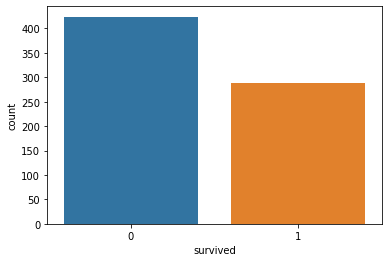

In [42]:
sns.countplot(df['survived'],label="Count")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

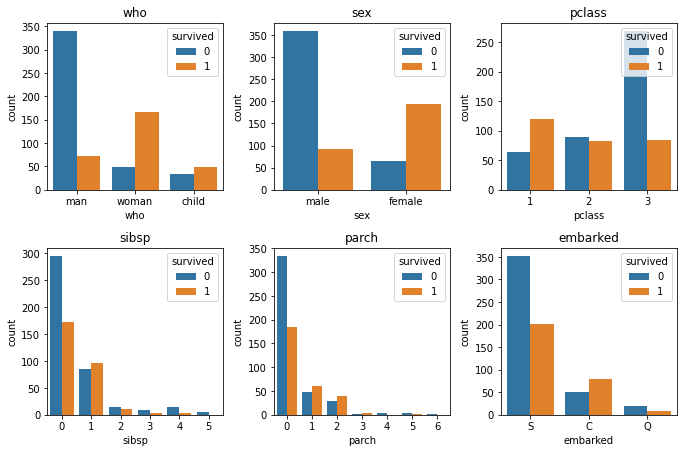

In [43]:
cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']

n_rows = 2
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c      
        ax = axs[r][c] 
        sns.countplot(df[cols[i]], hue=df["survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="survived", loc='upper right') 
        
plt.tight_layout()

In [44]:
df.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.963855,0.918919,0.460784
male,0.396040,0.151515,0.150198


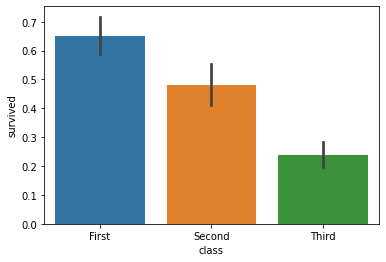

In [45]:
sns.barplot(x='class', y='survived', data=df)

In [46]:
df.drop(['embark_town'],inplace=True,axis=1)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True


In [47]:
sex = pd.get_dummies(df['sex'],drop_first=True)
embark = pd.get_dummies(df['embarked'],drop_first=True)

In [51]:
df=pd.concat([df.drop(['sex','embarked'],axis=1),sex,embark],axis=1)
df.head()

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,alive,alone,male,Q,S
0,0,3,22.0,1,0,7.2500,Third,man,True,no,False,1,0,1
1,1,1,38.0,1,0,71.2833,First,woman,False,yes,False,0,0,0
2,1,3,26.0,0,0,7.9250,Third,woman,False,yes,True,0,0,1
3,1,1,35.0,1,0,53.1000,First,woman,False,yes,False,0,0,1
4,0,3,35.0,0,0,8.0500,Third,man,True,no,True,1,0,1


In [55]:

df['familysize'] = df['sibsp'] + df['parch'] + 1

df[['familysize', 'survived']].groupby(['familysize'], as_index=False).mean().sort_values(by='survived', ascending=False)

,familysize,survived
3,4,0.777778
2,3,0.569892
1,2,0.546763
6,7,0.333333
0,1,0.318408
4,5,0.272727
5,6,0.136364
7,8,0.000000


In [56]:
df['IsAlone'] = 0
df.loc[df['familysize'] == 1, 'IsAlone'] = 1
df[['IsAlone', 'survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,survived
0,0,0.516129
1,1,0.318408


In [57]:
df = df.drop(['parch', 'sibsp', 'familysize'], axis=1)
df.head()

,survived,pclass,age,fare,class,who,adult_male,alive,alone,male,Q,S,IsAlone
0,0,3,22.0,7.2500,Third,man,True,no,False,1,0,1,0
1,1,1,38.0,71.2833,First,woman,False,yes,False,0,0,0,0
2,1,3,26.0,7.9250,Third,woman,False,yes,True,0,0,1,1
3,1,1,35.0,53.1000,First,woman,False,yes,False,0,0,1,0
4,0,3,35.0,8.0500,Third,man,True,no,True,1,0,1,1


In [59]:
df.drop(['who'],axis=1,inplace=True)

In [62]:
df['FareBand'] = pd.qcut(df['fare'], 4)
df[['FareBand', 'survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,survived
0,"(-0.001, 8.05]",0.204188
1,"(8.05, 15.646]",0.321212
2,"(15.646, 33.0]",0.486034
3,"(33.0, 512.329]",0.615819


In [63]:
df.loc[ df['fare'] <= 8.05, 'fare'] = 0
df.loc[(df['fare'] > 8.05) & (df['fare'] <= 15.646), 'fare'] = 1
df.loc[(df['fare'] > 15.646) & (df['fare'] <= 33.0), 'fare'] = 2
df.loc[ df['fare'] > 33.0, 'fare'] = 3
df['fare'] = df['fare'].astype(int)

In [72]:
df.drop(['class','alive','alone','adult_male','FareBand'],axis=1,inplace=True)
df.head()

,survived,pclass,age,fare,male,Q,S,IsAlone
0,0,3,22.0,0,1,0,1,0
1,1,1,38.0,3,0,0,0,0
2,1,3,26.0,0,0,0,1,1
3,1,1,35.0,3,0,0,1,0
4,0,3,35.0,0,1,0,1,1


In [73]:
df.shape

(712, 8)

In [74]:
from sklearn.model_selection import train_test_split
X = df.drop("survived", axis=1)
Y = df["survived"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
X_train.shape, Y_train.shape, X_test.shape,Y_test.shape

((569, 7), (569,), (143, 7), (143,))

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [76]:
def models(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [77]:
model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.7908611599297012
[1]K Nearest Neighbor Training Accuracy: 0.8611599297012302
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.7768014059753954
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8260105448154658
[4]Gaussian Naive Bayes Training Accuracy: 0.7469244288224957
[5]Decision Tree Classifier Training Accuracy: 0.9490333919156415
[6]Random Forest Classifier Training Accuracy: 0.9332161687170475


In [79]:
from sklearn.metrics import confusion_matrix 
for i in range(len(model)):
   cm = confusion_matrix(Y_test, model[i].predict(X_test)) 
   #extracting TN, FP, FN, TP
   TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
   print(cm)
   print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
   print()

[[70 12]
 [16 45]]
Model[0] Testing Accuracy = "0.8041958041958042 !"

[[76  6]
 [23 38]]
Model[1] Testing Accuracy = "0.7972027972027972 !"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902 !"

[[76  6]
 [26 35]]
Model[3] Testing Accuracy = "0.7762237762237763 !"

[[64 18]
 [17 44]]
Model[4] Testing Accuracy = "0.7552447552447552 !"

[[69 13]
 [10 51]]
Model[5] Testing Accuracy = "0.8391608391608392 !"

[[61 21]
 [14 47]]
Model[6] Testing Accuracy = "0.7552447552447552 !"



In [207]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 150, num = 20)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 10 )]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1,2,3]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': max_depth,
 'max_features': ['auto'],
 'min_samples_leaf': min_samples_leaf,
 'min_samples_split': min_samples_split,
 'n_estimators': n_estimators}

{'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 50], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 30, None], 'min_samples_split': [1, 2, 3], 'min_samples_leaf': [1, 2, 3], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [1, 2, 3],
 'n_estimators': [1,
  8,
  16,
  24,
  32,
  40,
  48,
  55,
  63,
  71,
  79,
  87,
  95,
  102,
  110,
  118,
  126,
  134,
  142,
  150]}

In [208]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(criterion = 'entropy')
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = param_grid, n_iter = 100, cv = 2, verbose=2, random_state=0, n_jobs = 2)
# Fit the random search model
rfr_random.fit(X_train, Y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  70 tasks      | elapsed:    5.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:   14.7s finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [209]:
rfr_random.best_params_

{'bootstrap': False,
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 55}

In [210]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 0,criterion = 'entropy')
base_model.fit(X_train, Y_train)
base_accuracy = base_model.score(X_test, Y_test)
base_accuracy

0.7552447552447552

In [226]:
best_random = rfr_random.best_estimator_
random_accuracy = best_random.score(X_test, Y_test)
random_accuracy

0.8461538461538461

In [228]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 12.04%.
